<a href="https://colab.research.google.com/github/AlexandrosMaragkakis/uni_ml_projects/blob/main/kdd99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-30-b5ad50f5b47c>:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 1] = encoder.fit_transform(X.iloc[:, 1])  # Encode the protocol_type feature
<ipython-input-30-b5ad50f5b47c>:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 2] = encoder.fit_transform(X.iloc[:, 2])  # Encode the service feature
<ipython-input-30-b5ad50f5b47c>:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use e

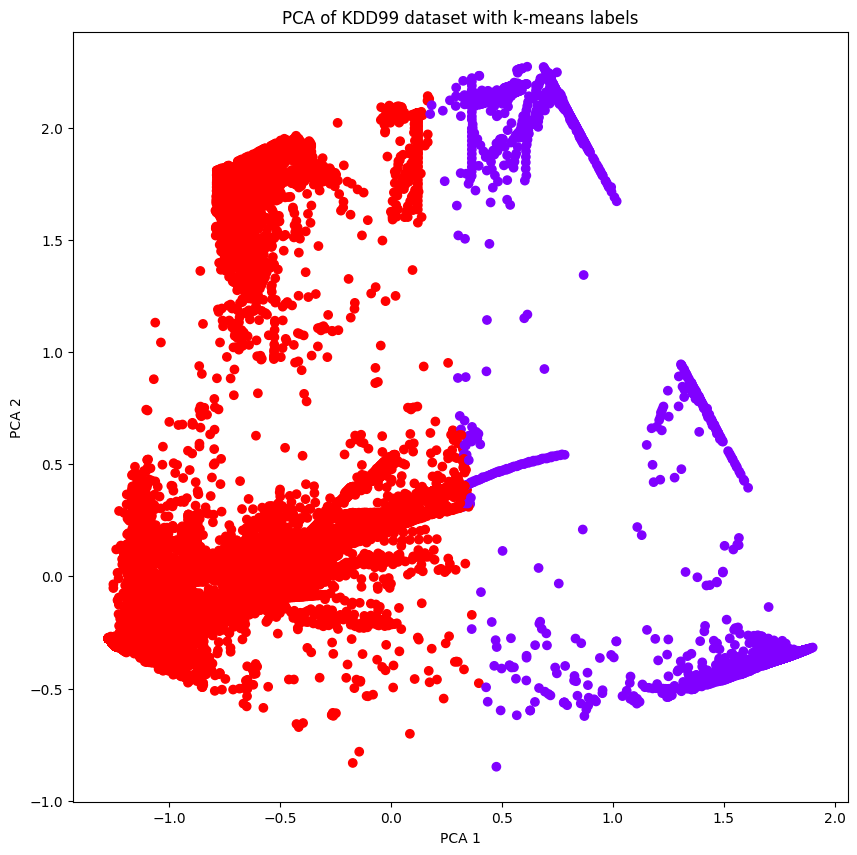

Percentage of normal in cluster 0: 0.05674510100627979%
Percentage of normal in cluster 1: 94.69994391475042%
Percentage of attack in cluster 0: 99.94325489899371%
Percentage of attack in cluster 1: 5.3000560852495795%


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the data
from sklearn.datasets import fetch_kddcup99
data = fetch_kddcup99(return_X_y=True, percent10=True) # Load only 10% of the whole dataset
X = data[0]
y = data[1]

# Byte string b'normal.'
# Change the target values to 'normal' for normal and 'attack' for everything else
y = pd.Series(y).apply(lambda x: 'normal' if x == b'normal.' else 'attack').values

# Load the data into a dataframe
X = pd.DataFrame(X)

# Remove duplicates from the dataframe
X.drop_duplicates(inplace=True)

# Remove the corresponding rows in the targets array
y = y[X.index] # Select only the target values that match the dataframe index

# Use LabelEncoder for the categorical values
encoder = LabelEncoder()
X.iloc[:, 1] = encoder.fit_transform(X.iloc[:, 1])  # Encode the protocol_type feature
X.iloc[:, 2] = encoder.fit_transform(X.iloc[:, 2])  # Encode the service feature
X.iloc[:, 3] = encoder.fit_transform(X.iloc[:, 3])  # Encode the flag feature


# Use MinMaxScaler for scaling the values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)



# Apply k-means with k=2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Visualize the results using PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of KDD99 dataset with k-means labels')
plt.show()

# Find out the percentages of the 'normal' and 'attack' on each cluster
cluster_0 = y[labels == 0] # Select the target values for cluster 0
cluster_1 = y[labels == 1] # Select the target values for cluster 1

normal_0 = (cluster_0 == 'normal').sum() / len(cluster_0) * 100 # Calculate the percentage of normal in cluster 0
normal_1 = (cluster_1 == 'normal').sum() / len(cluster_1) * 100 # Calculate the percentage of normal in cluster 1

attack_0 = (cluster_0 == 'attack').sum() / len(cluster_0) * 100 # Calculate the percentage of attack in cluster 0
attack_1 = (cluster_1 == 'attack').sum() / len(cluster_1) * 100 # Calculate the percentage of attack in cluster 1

print(f'Percentage of normal in cluster 0: {normal_0}%')
print(f'Percentage of normal in cluster 1: {normal_1}%')
print(f'Percentage of attack in cluster 0: {attack_0}%')
print(f'Percentage of attack in cluster 1: {attack_1}%')